In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.max_rows = 200
pd.max_columns = 200
plt.rcParams['figure.figsize'] = (12,10)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Home Credit Default/application_train.csv')

In [ ]:
df_copy = df.copy()

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [ ]:
target = df['TARGET']
sk_id_curr = df['SK_ID_CURR']

In [ ]:
list(df.columns)

At the outset, lets just remove null values, fit a classification model, and see how it performs.

Separate out the categorical and numerical features.

In [ ]:
numerical = [
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE', 
]

In [ ]:
len(numerical)

61

In [ ]:
df_numerical = df.loc[:, numerical]

In [ ]:

df_categorical = df.drop(numerical, axis=1)

# Lets deal with numerical columns

In [ ]:
df_numerical.info(verbose=True)

In [ ]:
df_numerical.isnull().sum()

AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
REGION_POPULATION_RELATIVE       0
                              ... 
OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OBS_60_CNT_SOCIAL_CIRCLE      1021
DEF_60_CNT_SOCIAL_CIRCLE      1021
DAYS_LAST_PHONE_CHANGE           1
Length: 61, dtype: int64

Lets drop the features having high number of NULL values for now (features with more than 1,00,000 null values).

Some columns have high number of null values. Lets list out those columns

In [ ]:
list_high_nulls_numerical = ['OWN_CAR_AGE',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

In [ ]:
df_numerical = df_numerical.drop(list_high_nulls_numerical, axis=1)
df_numerical.head()

Lets confirm the absence of NULLS

In [ ]:
df_numerical.isnull().sum()

AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
REGION_POPULATION_RELATIVE       0
                              ... 
OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OBS_60_CNT_SOCIAL_CIRCLE      1021
DEF_60_CNT_SOCIAL_CIRCLE      1021
DAYS_LAST_PHONE_CHANGE           1
Length: 61, dtype: int64

External ratings columns are very important as predictors. Hence, we will not drop these columns.

Lets list the columns having less number of NULLS, and drop them. We will add them later to the dataset.

In [ ]:
# dropping columns with even one NULL value
list_low_nulls_numerical = ['AMT_ANNUITY','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                            'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [ ]:
df_numerical = df_numerical.drop(list_low_nulls_numerical, axis=1)

In [ ]:
df_numerical.isnull().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
DAYS_LAST_PHONE_CHANGE             1
dtype: int64

The columns "DAYS..." represent the days passed since an event. They have negative values, to represent time passed. Lets make them postive.

In [ ]:
df_numerical['DAYS_BIRTH'] = -df_numerical['DAYS_BIRTH']

In [ ]:
(df_numerical['DAYS_BIRTH'] < 0).sum()

0

In [ ]:
df_numerical['DAYS_EMPLOYED'] = -df_numerical['DAYS_EMPLOYED']

In [ ]:
(df_numerical['DAYS_EMPLOYED'] < 0).sum()

55374

In [ ]:
df_numerical[df_numerical['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].value_counts()

-365243    55374
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
print(365243/365.0)

1000.6657534246575


365243 days means 1000 years!!!
This is impossible, hence these values are garbage values. We will replace the null values with the mean of the column and analyse the difference in modelling.

In [ ]:
df_numerical.loc[df_numerical['DAYS_EMPLOYED'] < 0,'DAYS_EMPLOYED'] = np.nan

In [ ]:
df_numerical['DAYS_REGISTRATION'] = -df_numerical['DAYS_REGISTRATION'] # checking for negative values

In [ ]:
(df_numerical['DAYS_REGISTRATION'] < 0).sum()

0

There is no postive value. Lets convert all negative values to positive.

In [ ]:
df_numerical['DAYS_ID_PUBLISH'] = -df_numerical['DAYS_ID_PUBLISH']

In [ ]:
(df_numerical['DAYS_ID_PUBLISH'] < 0).sum()

0

In [ ]:
df_numerical['DAYS_LAST_PHONE_CHANGE'] = -df_numerical['DAYS_LAST_PHONE_CHANGE']

In [ ]:
(df_numerical['DAYS_LAST_PHONE_CHANGE'] < 0).sum()  # checking for negative values

0

The final step is to impute the few null values in these columns. We will use SimpleImputer with strategy = 'mean' (since, there son't seem to be outliers, 'mean' will work fine here).

In [ ]:
# imputing with mean, using Simple Imputer

from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy= 'mean')

In [ ]:
df_numerical = pd.DataFrame(imputer_mean.fit_transform(df_numerical), columns=df_numerical.columns)

In [ ]:
(df_numerical.isnull().sum() > 0).sum() # checking for presence of NULL values in columns

0

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_numerical)

In [ ]:
# converting the numpy array returned by "scaler" back to a dataframe

df_numerical = pd.DataFrame(scaled_numerical, columns= df_numerical.columns)

In [ ]:
df_numerical

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,-1.506880,-0.747179,-0.379837,-0.579154,NaN,-1.985644,-1.316049,-1.906536,-0.856805,-0.625225,-0.093458,-1.176485,-0.398771,-0.586596,-0.806853,-0.988535,-0.662374,-0.362552,-0.870367,-0.799527,-0.184547,-0.407891,-0.824852,-0.584095,-0.075344,-1.140103,-0.378178,-0.563225,-0.754557,-0.967337,-0.639483,-0.333428,-0.854566,-0.770487,-0.174526,-0.384640,-0.851244,-0.621268,-0.092697,-1.172939,-0.396553,-0.580648,-0.799186,-0.982974,-0.658452,-0.361080,-0.869851,-0.795536,-0.182455,-0.402415,-0.815606,0.240632,4.156232,0.249898,5.244279,0.206990
1,0.426792,1.725450,0.592666,1.599974,-1.252750,0.166821,-0.511543,-1.078697,-1.790855,NaN,-0.904298,0.564499,NaN,-0.199007,-0.431140,0.124363,0.384259,0.208841,0.007865,-1.151685,0.452281,0.628373,-0.656948,-0.253574,-0.474829,-0.102839,-0.266930,-0.202259,-0.400243,0.124423,0.402892,0.096003,0.046200,-1.096220,0.482816,0.653029,-0.638015,-0.272220,-0.452189,-0.174526,-0.384640,-0.192985,-0.426570,0.122673,0.383290,0.212820,0.014295,-1.142921,0.453608,0.627885,-0.656820,-0.248334,-0.470397,-0.100202,-0.259896,-0.289839,-0.175863,-0.321069,-0.170305,-0.276157,-0.163108
2,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,0.689509,-0.923371,-0.206116,-0.306869,1.166948,NaN,0.217311,1.122507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.592359,-0.321069,-0.590509,-0.276157,-0.178831
3,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,0.680114,0.280039,1.375829,-0.369143,NaN,NaN,0.712075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240632,-0.321069,0.249898,-0.276157,-0.418306
4,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,0.892535,0.279611,-0.191639,0.307263,NaN,NaN,-1.003112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.592359,-0.321069,-0.590509,-0.276157,0.173125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.047646,-0.855489,0.031008,-0.848287,0.845396,-1.537586,-0.918667,0.984955,-0.670578,NaN,-1.689363,0.875326,NaN,0.782147,0.003127,0.166576,0.684401,-0.321176,1.048173,-0.463021,2.612814,0.241087,-0.085402,0.514447,0.805876,1.393031,1.167129,-0.124435,-0.834371,0.017571,-0.428091,-0.340566,0.046200,-1.096220,1.642103,-1.156364,-0.679605,-0.178227,-0.184855,-0.174526,-0.206713,0.789820,0.009067,0.164411,0.683114,-0.319068,1.055445,-0.456448,2.607792,0.241922,-0.081161,0.522689,0.815013,

We have prepared a basic numerical DataFrame having no nulls.

# Lets have a look at the categorical columns

In [ ]:
df_categorical = df_categorical.drop('SK_ID_CURR', axis=1)

In [ ]:
# do NOT drop "TARGET"
# df_categorical = df_categorical.drop(['SK_ID_CURR'], axis=1)
#  drop TARGET, and add it at the end. It will be used for chi-square calculation.
categorical_null_series = df_categorical.isnull().sum()
categorical_null_series

In [ ]:
categorical_null_values = categorical_null_series.values
categorical_null_values

array([     0,      0,      0,      0,      0,      0,   1292,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,  96391,      2,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0, 210295, 154297,
       156341, 145755,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,  41519,  41519,
        41519,  41519,  41519,  41519])

In [ ]:
df_categorical.columns

In [ ]:
# getting the number of columns
len(categorical_null_values)

60

Lets first convert all these columns to "category" dtype

In [ ]:
df_categorical = df_categorical.astype('category')

In [ ]:
df_categorical.dtypes

TARGET                         category
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                   category
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
FLAG_MOBIL                     category
FLAG_EMP_PHONE                 category
FLAG_WORK_PHONE                category
FLAG_CONT_MOBILE               category
FLAG_PHONE                     category
FLAG_EMAIL                     category
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                category
REGION_RATING_CLIENT           category
REGION_RATING_CLIENT_W_CITY    category
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START        category
REG_REGION_NOT_LIVE_REGION     category
REG_REGION_NOT_WORK_REGION     category


lets perform chi-square test for all variables, to see which columns are significant.

In [ ]:
from scipy import stats

In [ ]:
categorical = list(df_categorical.columns)
len(categorical)

60

In [ ]:
categorical.remove('TARGET')
# because we don't want to take the chi-square of TARGET with itself
categorical

# now 'categorical' list has 59 elements, but df_categorical has 60 columns.
# we have not dropped 'TARGET' from the dataframe because we need it for chi-square calculation

In [ ]:
chi_square_values = []
p_values = []
for col in list(df_categorical.columns):
  contingency_table = pd.crosstab(df_categorical[col], df_categorical['TARGET'])
  chi_square_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
  chi_square_values.append(chi_square_stat)
  p_values.append(p_val)

In [ ]:
# 'categorical' has 59 elements, but 'chi_square_values' and 'p_values' have 60 elements. We will add 'TARGET' to 'categorical'

# add either at the end or the beginning
categorical.append('TARGET')

#categorical.insert(0, 'TARGET')

categorical

In [ ]:
df_categorical_chi_square = pd.DataFrame({"column" : categorical, "chi-square": chi_square_values, "p-value":p_values})

In [ ]:
df_categorical_chi_square

,column,chi-square,p-value
0,NAME_CONTRACT_TYPE,293.150542,1.023515e-65
1,CODE_GENDER,920.791334,1.129022e-200
2,FLAG_OWN_CAR,146.656018,9.330994e-34
3,FLAG_OWN_REALTY,11.575827,6.681470e-04
4,CNT_CHILDREN,185.451787,5.061089e-32
5,NAME_TYPE_SUITE,32.825315,1.132931e-05
6,NAME_INCOME_TYPE,1253.470808,1.928146e-266
7,NAME_EDUCATION_TYPE,1019.213187,2.447681e-219
8,NAME_FAMILY_STATUS,504.694083,7.744842e-107
9,NAME_HOUSING_TYPE,420.556190,1.099089e-88


In [ ]:
df_categorical_chi_square['null values'] = df_categorical.isnull().sum().values

In [ ]:
df_categorical_chi_square

,column,chi-square,p-value,null values
0,NAME_CONTRACT_TYPE,293.150542,1.023515e-65,0
1,CODE_GENDER,920.791334,1.129022e-200,0
2,FLAG_OWN_CAR,146.656018,9.330994e-34,0
3,FLAG_OWN_REALTY,11.575827,6.681470e-04,0
4,CNT_CHILDREN,185.451787,5.061089e-32,0
5,NAME_TYPE_SUITE,32.825315,1.132931e-05,1292
6,NAME_INCOME_TYPE,1253.470808,1.928146e-266,0
7,NAME_EDUCATION_TYPE,1019.213187,2.447681e-219,0
8,NAME_FAMILY_STATUS,504.694083,7.744842e-107,0
9,NAME_HOUSING_TYPE,420.556190,1.099089e-88,0


The above dataframe contains each column's chi-square statistic, as well as the number of NULL values in that column.

The chi-square test is used to evaluate statistical signifcance of categorical features in predicting categorical target. As we can see, the chi-square values are very widely spread.

In [ ]:
df_categorical_chi_square.sort_values('chi-square', ascending=False)

Lets sort by number of NULL values.

In [ ]:
df_categorical_chi_square.sort_values('null values', ascending=False)

Lets plot the chi-square values to get a better understanding of the dataset.

Text(0, 0.5, 'Chi-square value')

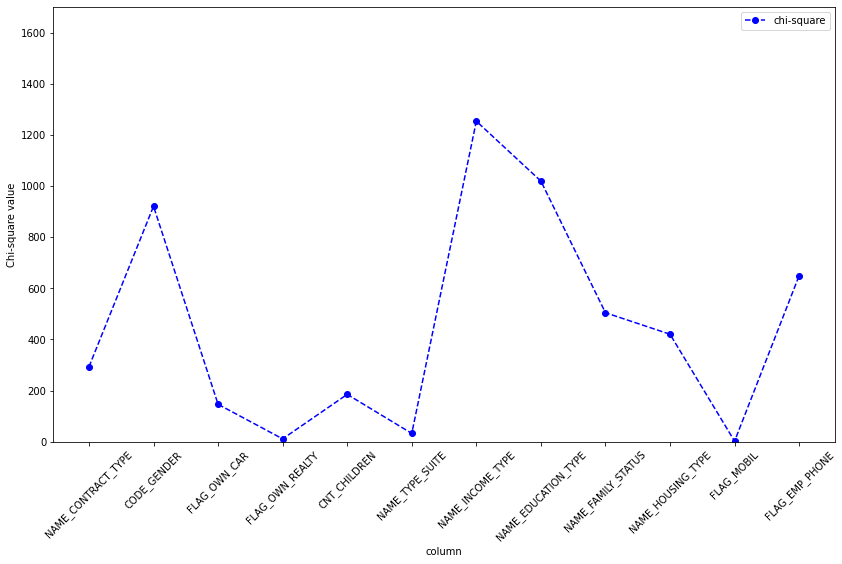

In [ ]:
plt.rcParams['figure.figsize'] = (14,8)
df_categorical_chi_square.iloc[0:12,:].plot(x='column', y='chi-square', marker = 'o', color='blue', linestyle="--")
plt.xticks(range(12), labels=df_categorical_chi_square['column'][:12], rotation=45)
plt.ylim(0,1700)
plt.ylabel("Chi-square value")

We see that INCOME-TYPE and EDUCATION_TYPE are signifcant predictors in determining the health of the loan. We usually expect people with more educated people to have higher income, and hence default less.

Here we have plotted only 12 of the categorical variables due to space constraints, to not make the plot congested. Lets plot the remaining columns, in groups of 12 each.

Text(0, 0.5, 'Chi-square value')

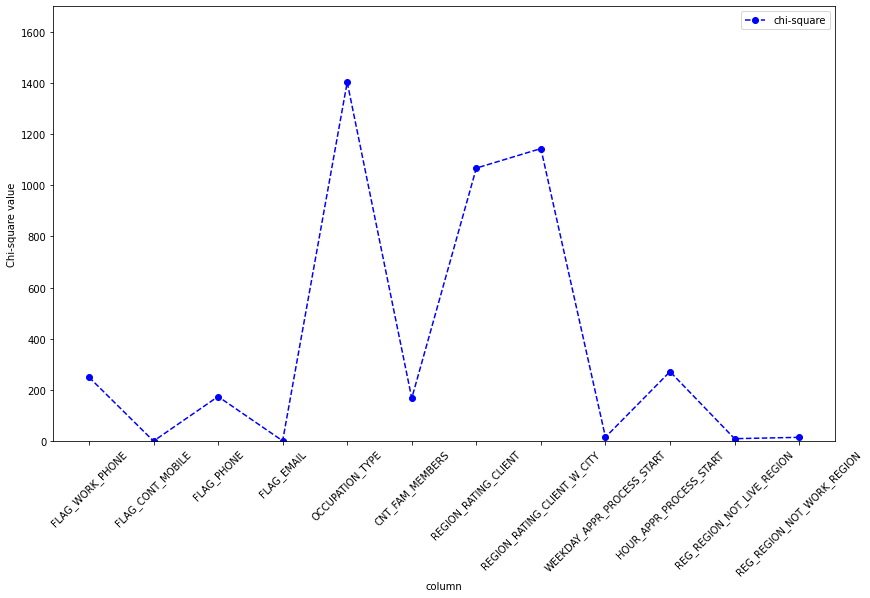

In [ ]:
plt.rcParams['figure.figsize'] = (14,8)
df_categorical_chi_square.iloc[12:24,:].plot(x='column', y='chi-square', marker = 'o', color='blue', linestyle="--")
plt.xticks(range(12), labels=df_categorical_chi_square['column'][12:24], rotation=45)
plt.ylim(0,1700)
plt.ylabel("Chi-square value")

The OCCUPATION of the client, and the rating of the region seem to be very important predictors.

Text(0, 0.5, 'Chi-square value')

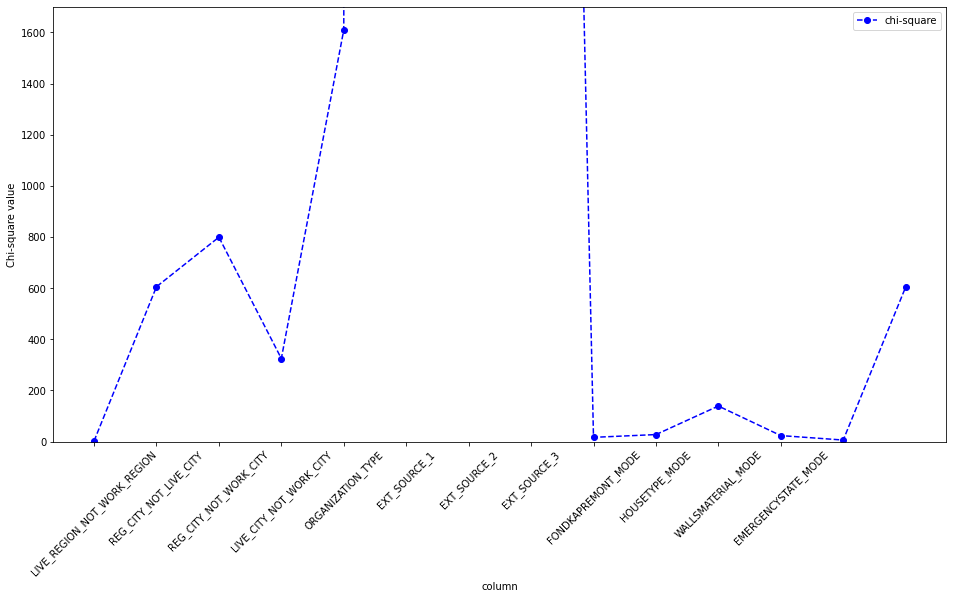

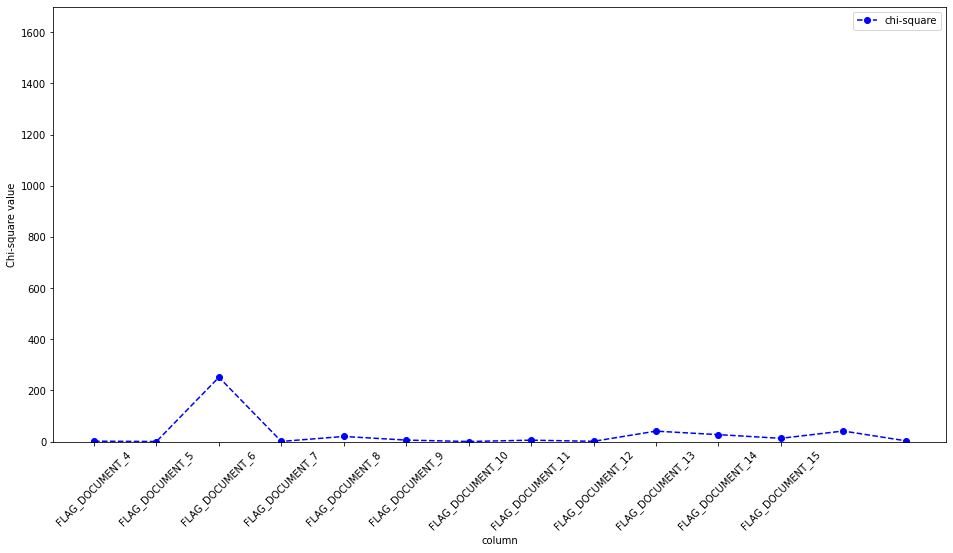

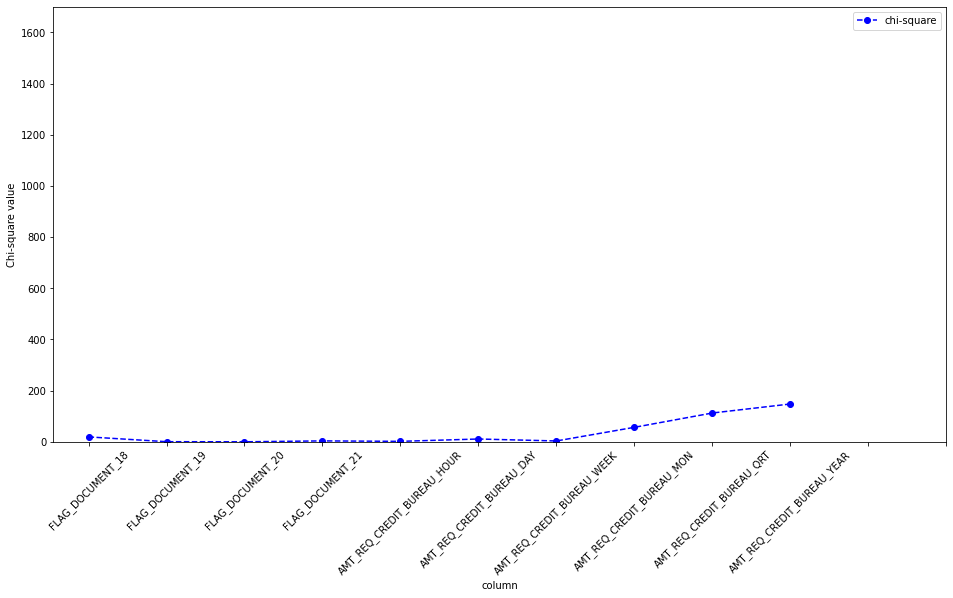

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)

df_categorical_chi_square.iloc[24:38,:].plot(x='column', y='chi-square', marker = 'o', color='blue', linestyle="--")
plt.xticks(range(12), labels=df_categorical_chi_square['column'][24:38], rotation=45)
plt.ylim(0,1700)
plt.ylabel("Chi-square value")

df_categorical_chi_square.iloc[38:52,:].plot(x='column', y='chi-square', marker = 'o', color='blue', linestyle="--")
plt.xticks(range(12), labels=df_categorical_chi_square['column'][38:52], rotation=45)
plt.ylim(0,1700)
plt.ylabel("Chi-square value")

df_categorical_chi_square.iloc[52:62,:].plot(x='column', y='chi-square', marker = 'o', color='blue', linestyle="--")
plt.xticks(range(12), labels=df_categorical_chi_square['column'][52:62], rotation=45)
plt.ylim(0,1700)
plt.ylabel("Chi-square value")

ORGANIZATION-TYPE of the client is an important predictor. Mismatch between cities of permanent residency and work seem to have some effect, but the significance is relatively small.

The chi-square values of External rating columns overshoot the y-limit. Definitely, these are significant features.

The presenting or withholding of various documents seems to be inconsequential in deciding the health of a loan. This is an interesting observation !!! Normally, we would expect good borrowers to provide all the documents, and vice-versa.

From the above plots, we can have an idea about which columns to drop if they contain large number of nulls. Lets again take a look at the number of NULL values.

Take a look at the 15 columns with the largest number of NULL values

In [ ]:
df_categorical_chi_square.sort_values('null values', ascending=False).iloc[:15,:]

,column,chi-square,p-value,null values
29,FONDKAPREMONT_MODE,16.809897,7.732982e-04,210295
31,WALLSMATERIAL_MODE,139.235314,1.453180e-27,156341
30,HOUSETYPE_MODE,27.632556,9.992328e-07,154297
32,EMERGENCYSTATE_MODE,23.678150,1.138680e-06,145755
16,OCCUPATION_TYPE,1402.846796,3.784500e-288,96391
53,AMT_REQ_CREDIT_BUREAU_HOUR,1.731751,7.849423e-01,41519
58,AMT_REQ_CREDIT_BUREAU_YEAR,147.734585,8.720141e-20,41519
57,AMT_REQ_CREDIT_BUREAU_QRT,112.494071,1.674314e-19,41519
56,AMT_REQ_CREDIT_BUREAU_MON,56.557215,1.182582e-04,41519
55,AMT_REQ_CREDIT_BUREAU_WEEK,3.257560,9.171701e-01,41519


***dropping columns with hig NULL values (about half the values or more are null)***

In [ ]:
# listing columns with about half or more NULL values

list_high_null_categorical = ['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE']

In [ ]:
# dropping those columns
df_categorical = df_categorical.drop(list_high_null_categorical, axis=1)

Lets now impute the remaining with the most frequent values

In [ ]:
# using imputation with SimpleImputer is going into infinite loop due to some reason. 
# we will impute values manually

In [ ]:
df_categorical = df_categorical.drop('TARGET', axis=1)

In [ ]:
categorical = list(df_categorical.columns)
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLA

In [ ]:
# defining function for NULL removal

'''def remove_NULL_category(column):
    column_mode = column.value_counts()[0]
    return column.fillna(column_mode)    '''

'def remove_NULL_category(column):\n  column_mode = column.value_counts()[0]\n  return column.fillna(column_mode)    '

In [ ]:
# imputing al NULL values in categorical columns with the MODE of that column
# loop to apply fillna() on all columns of df_categorical

for col in list(df_categorical.columns):
  col_mode = df_categorical[col].value_counts().idxmax()
  df_categorical[col] = df_categorical[col].fillna(col_mode)

In [ ]:
(df_categorical.isnull().sum() > 0).sum()

0

# Voila ! All NULLs have been removed

In [ ]:
df_categorical.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCU

In [ ]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# lets convert the dataframe to one with Dummy variables, i.e., lets do "one-hot" encoding
df_cat_dummies = pd.get_dummies(df_categorical, drop_first=True)


In [ ]:
df_categorical.isnull

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6,CNT_CHILDREN_7,CNT_CHILDREN_8,CNT_CHILDREN_9,CNT_CHILDREN_10,CNT_CHILDREN_11,CNT_CHILDREN_12,CNT_CHILDREN_14,CNT_CHILDREN_19,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,...,AMT_REQ_CREDIT_BUREAU_MON_18.0,AMT_REQ_CREDIT_BUREAU_MON_19.0,AMT_REQ_CREDIT_BUREAU_MON_22.0,AMT_REQ_CREDIT_BUREAU_MON_23.0,AMT_REQ_CREDIT_BUREAU_MON_24.0,AMT_REQ_CREDIT_BUREAU_MON_27.0,AMT_REQ_CREDIT_BUREAU_QRT_1.0,AMT_REQ_CREDIT_BUREAU_QRT_2.0,AMT_REQ_CREDIT_BUREAU_QRT_3.0,AMT_REQ_CREDIT_BUREAU_QRT_4.0,AMT_REQ_CREDIT_BUREAU_QRT_5.0,AMT_REQ_CREDIT_BUREAU_QRT_6.0,AMT_REQ_CREDIT_BUREAU_QRT_7.0,AMT_REQ_CREDIT_BUREAU_QRT_8.0,AMT_REQ_CREDIT_BUREAU_QRT_19.0,AMT_REQ_CREDIT_BUREAU_QRT_261.0,AMT_REQ_CREDIT_BUREAU_YEAR_1.0,AMT_REQ_CREDIT_BUREAU_YEAR_2.0,AMT_REQ_CREDIT_BUREAU_YEAR_3.0,AMT_REQ_CREDIT_BUREAU_YEAR_4.0,AMT_REQ_CREDIT_BUREAU_YEAR_5.0,AMT_REQ_CREDIT_BUREAU_YEAR_6.0,AMT_REQ_CREDIT_BUREAU_YEAR_7.0,AMT_REQ_CREDIT_BUREAU_YEAR_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_9.0,AMT_REQ_CREDIT_BUREAU_YEAR_10.0,AMT_REQ_CREDIT_BUREAU_YEAR_11.0,AMT_REQ_CREDIT_BUREAU_YEAR_12.0,AMT_REQ_CREDIT_BUREAU_YEAR_13.0,AMT_REQ_CREDIT_BUREAU_YEAR_14.0,AMT_REQ_CREDIT_BUREAU_YEAR_15.0,AMT_REQ_CREDIT_BUREAU_YEAR_16.0,AMT_REQ_CREDIT_BUREAU_YEAR_17.0,AMT_REQ_CREDIT_BUREAU_YEAR_18.0,AMT_REQ_CREDIT_BUREAU_YEAR_19.0,AMT_REQ_CREDIT_BUREAU_YEAR_20.0,AMT_REQ_CREDIT_BUREAU_YEAR_21.0,AMT_REQ_CREDIT_BUREAU_YEAR_22.0,AMT_REQ_CREDIT_BUREAU_YEAR_23.0,AMT_REQ_CREDIT_BUREAU_YEAR_25.0
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,

# CONCATENATING NUMERICAL AND CATEGORICAL DATA FOR MODELLING

In [ ]:
# checking for consistency in shape of numericcal dataframe and categorical dataframe

df_numerical.shape, df_cat_dummies.shape

((307511, 61), (307511, 290))

In [ ]:
df_concatenated = pd.concat([df_numerical, df_cat_dummies], axis=1)

In [ ]:
df_concatenated.shape

(307511, 351)

In [ ]:
# our concatenated dataframe is now ready for modelling

In [ ]:
X = df_concatenated.values
y = df['TARGET'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(solver='liblinear', C = 0.01)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(lr_model, params)
clf

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=0.01, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.91926637, 0.91943981, 0.91907126, 0.91915622, 0.91924294])

In [ ]:
y_pred = lr_model.predict(X_test)
y_train_pred = lr_model.predict(X_train)

In [ ]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
print("Training recall: ", recall_score(y_train, y_train_pred))
print("Training precision: ", precision_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

Training accuracy:  0.91930469620566
Training recall:  0.011384995435261265
Training precision:  0.5120772946859904


array([[211810,    202],
       [ 18409,    212]])

In [ ]:
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Test recall: ", recall_score(y_test, y_pred))
print("Test precision: ", precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Test accuracy:  0.9192226644813861
Test recall:  0.010638297872340425
Test precision:  0.4782608695652174


array([[70602,    72],
       [ 6138,    66]])

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[211744,    268],
       [ 18343,    278]])

In [ ]:
precision_score(y_train, y_train_pred)

0.5091575091575091

In [ ]:
confusion_matrix(y_test, y_pred)

array([[70577,    97],
       [ 6123,    81]])